In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize


In [2]:
dataset = pd.read_csv('/content/Loan_Assignment.csv')
dataset.head()

,id,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,title,zip_code,dti,fico_range_low,tot_cur_bal,loan_status
0,68407277,3600,36 months,13.99,123.03,10+ years,MORTGAGE,55000.0,Not Verified,debt_consolidation,Debt consolidation,190xx,5.91,675.0,144904,Fully Paid
1,68355089,24700,36 months,11.99,820.28,10+ years,MORTGAGE,65000.0,Not Verified,small_business,Business,577xx,16.06,715.0,204396,Fully Paid
2,68341763,20000,60 months,10.78,432.66,10+ years,MORTGAGE,63000.0,Not Verified,home_improvement,NaN,605xx,10.78,695.0,189699,Fully Paid
3,66310712,35000,60 months,14.85,829.90,10+ years,MORTGAGE,110000.0,Source Verified,debt_consolidation,Debt consolidation,076xx,17.06,785.0,301500,Charged Off
4,68476807,10400,60 months,22.45,289.91,3 years,MORTGAGE,104433.0,Source Verified,major_purchase,Major purchase,174xx,25.37,695.0,331730,Fully Paid


In [3]:
dataset["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)'], dtype=object)

###DATA PREPROCESSING

In [4]:
dataset.nunique()

,0
id,2247
loan_amnt,406
term,2
int_rate,35
installment,1248
emp_length,11
home_ownership,3
annual_inc,500
verification_status,3
purpose,11


In [5]:
dataset.drop_duplicates(inplace=True)
dataset.shape

(2247, 16)

In [6]:
dataset.nunique()

,0
id,2247
loan_amnt,406
term,2
int_rate,35
installment,1248
emp_length,11
home_ownership,3
annual_inc,500
verification_status,3
purpose,11


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2247 non-null   int64  
 1   loan_amnt            2247 non-null   int64  
 2   term                 2247 non-null   object 
 3   int_rate             2247 non-null   float64
 4   installment          2247 non-null   float64
 5   emp_length           2146 non-null   object 
 6   home_ownership       2247 non-null   object 
 7   annual_inc           2247 non-null   float64
 8   verification_status  2247 non-null   object 
 9   purpose              2247 non-null   object 
 10  title                2193 non-null   object 
 11  zip_code             2247 non-null   object 
 12  dti                  2247 non-null   float64
 13  fico_range_low       2243 non-null   float64
 14  tot_cur_bal          2247 non-null   int64  
 15  loan_status          2247 non-null   o

In [8]:
for i in dataset:
  if dataset[i].isnull().sum() > 0:
    if pd.api.types.is_numeric_dtype(dataset[i]):
      dataset[i].fillna(dataset[i].max(), inplace=True)
    else:
      dataset[i].fillna(dataset[i].mode()[0], inplace=True)

<ipython-input-8-2740818a493e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mode()[0], inplace=True)
<ipython-input-8-2740818a493e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [9]:
dataset.drop_duplicates(inplace=True)
dataset.shape

(2247, 16)

In [10]:
print(f"Categorical Variables: {dataset.select_dtypes(include=['object','bool']).columns.tolist()}")
print(f"Numerical Variables: {dataset.select_dtypes(include=np.number).columns.tolist()}")

Categorical Variables: ['term', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'title', 'zip_code', 'loan_status']
Numerical Variables: ['id', 'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'fico_range_low', 'tot_cur_bal']


In [11]:
le = LabelEncoder()
categorical = ['verification_status','home_ownership','loan_status',"title","term","emp_length","purpose","zip_code"]
for i in categorical:
    dataset[i] = le.fit_transform(dataset[i])

dataset

,id,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,title,zip_code,dti,fico_range_low,tot_cur_bal,loan_status
0,68407277,3600,0,13.99,123.03,1,0,55000.0,0,2,3,124,5.91,675.0,144904,1
1,68355089,24700,0,11.99,820.28,1,0,65000.0,0,9,0,367,16.06,715.0,204396,1
2,68341763,20000,1,10.78,432.66,1,0,63000.0,0,3,3,378,10.78,695.0,189699,1
3,66310712,35000,1,14.85,829.90,1,0,110000.0,1,2,3,49,17.06,785.0,301500,0
4,68476807,10400,1,22.45,289.91,3,0,104433.0,1,5,6,115,25.37,695.0,331730,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,68465005,15000,0,6.49,459.67,3,0,35000.0,1,2,3,83,19.68,690.0,109174,1
2243,68535442,18000,0,12.88,605.46,8,1,81000.0,0,3,5,423,29.03,680.0,140459,1
2244,66540973,4400,0,7.49,136.85,4,0,49000.0,1,1,2,205,18.79,705.0,236268,1
2245,68495264,24000,0,10.78,783.24,1,0,160000.0,1,2,3,329,12.66,670.0,243241,1


In [12]:
#Imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
dataset = pd.DataFrame(imputer.fit_transform(dataset), columns=dataset.columns)
X = dataset
X.head()

,id,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,title,zip_code,dti,fico_range_low,tot_cur_bal,loan_status
0,68407277.0,3600.0,0.0,13.99,123.03,1.0,0.0,55000.0,0.0,2.0,3.0,124.0,5.91,675.0,144904.0,1.0
1,68355089.0,24700.0,0.0,11.99,820.28,1.0,0.0,65000.0,0.0,9.0,0.0,367.0,16.06,715.0,204396.0,1.0
2,68341763.0,20000.0,1.0,10.78,432.66,1.0,0.0,63000.0,0.0,3.0,3.0,378.0,10.78,695.0,189699.0,1.0
3,66310712.0,35000.0,1.0,14.85,829.90,1.0,0.0,110000.0,1.0,2.0,3.0,49.0,17.06,785.0,301500.0,0.0
4,68476807.0,10400.0,1.0,22.45,289.91,3.0,0.0,104433.0,1.0,5.0,6.0,115.0,25.37,695.0,331730.0,1.0


In [13]:
dataset = dataset.drop(["id"], axis=1)
dataset.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,title,zip_code,dti,fico_range_low,tot_cur_bal,loan_status
0,3600.0,0.0,13.99,123.03,1.0,0.0,55000.0,0.0,2.0,3.0,124.0,5.91,675.0,144904.0,1.0
1,24700.0,0.0,11.99,820.28,1.0,0.0,65000.0,0.0,9.0,0.0,367.0,16.06,715.0,204396.0,1.0
2,20000.0,1.0,10.78,432.66,1.0,0.0,63000.0,0.0,3.0,3.0,378.0,10.78,695.0,189699.0,1.0
3,35000.0,1.0,14.85,829.90,1.0,0.0,110000.0,1.0,2.0,3.0,49.0,17.06,785.0,301500.0,0.0
4,10400.0,1.0,22.45,289.91,3.0,0.0,104433.0,1.0,5.0,6.0,115.0,25.37,695.0,331730.0,1.0


###NORMALIZING & Dataset splitting

In [14]:
#Train Test Split
X = dataset.drop('loan_status', axis=1)
y = dataset['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)


(1797, 14)
(450, 14)


In [15]:
for i in dataset:
    if dataset[i].nunique() > 100:
        step_size = (dataset[i].max() - dataset[i].min())
        dataset[i] = (dataset[i] - dataset[i].min())

In [16]:
dataset

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,title,zip_code,dti,fico_range_low,tot_cur_bal,loan_status
0,2600.0,0.0,13.99,91.92,1.0,0.0,43480.0,0.0,2.0,3.0,124.0,5.91,675.0,144548.0,1.0
1,23700.0,0.0,11.99,789.17,1.0,0.0,53480.0,0.0,9.0,0.0,367.0,16.06,715.0,204040.0,1.0
2,19000.0,1.0,10.78,401.55,1.0,0.0,51480.0,0.0,3.0,3.0,378.0,10.78,695.0,189343.0,1.0
3,34000.0,1.0,14.85,798.79,1.0,0.0,98480.0,1.0,2.0,3.0,49.0,17.06,785.0,301144.0,0.0
4,9400.0,1.0,22.45,258.80,3.0,0.0,92913.0,1.0,5.0,6.0,115.0,25.37,695.0,331374.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,14000.0,0.0,6.49,428.56,3.0,0.0,23480.0,1.0,2.0,3.0,83.0,19.68,690.0,108818.0,1.0
2243,17000.0,0.0,12.88,574.35,8.0,1.0,69480.0,0.0,3.0,5.0,423.0,29.03,680.0,140103.0,1.0
2244,3400.0,0.0,7.49,105.74,4.0,0.0,37480.0,1.0,1.0,2.0,205.0,18.79,705.0,235912.0,1.0
2245,23000.0,0.0,10.78,752.13,1.0,0.0,148480.0,1.0,2.0,3.0,329.0,12.66,670.0,242885.0,1.0


##Scalings

In [17]:
#Standard Scaling
scaler = StandardScaler()
numerical = ['verification_status','purpose','home_ownership',"title","term","emp_length","zip_code"]
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
#Mni_Max Scaling
scaler = MinMaxScaler()
numerical = ['verification_status','purpose','home_ownership',"title","term","emp_length","zip_code"]
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled

array([[0.20588235, 0.        , 0.41130773, ..., 0.43973453, 0.        ,
        0.0110653 ],
       [0.41176471, 1.        , 0.62883038, ..., 0.33483194, 0.        ,
        0.33212204],
       [0.27205882, 0.        , 0.48640483, ..., 0.62149433, 0.10810811,
        0.09369731],
       ...,
       [0.67647059, 1.        , 0.16616314, ..., 0.24962535, 0.59459459,
        0.29638321],
       [1.        , 0.        , 0.32628399, ..., 0.15392849, 0.21621622,
        0.01074879],
       [0.        , 0.        , 0.32628399, ..., 0.83729394, 0.18918919,
        0.02004559]])

In [20]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.66


In [21]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)

print("KNN test accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

KNN test accuracy: 0.72


In [22]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

#train
knn.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    knn.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.74


##Model selection/Comparison analysis

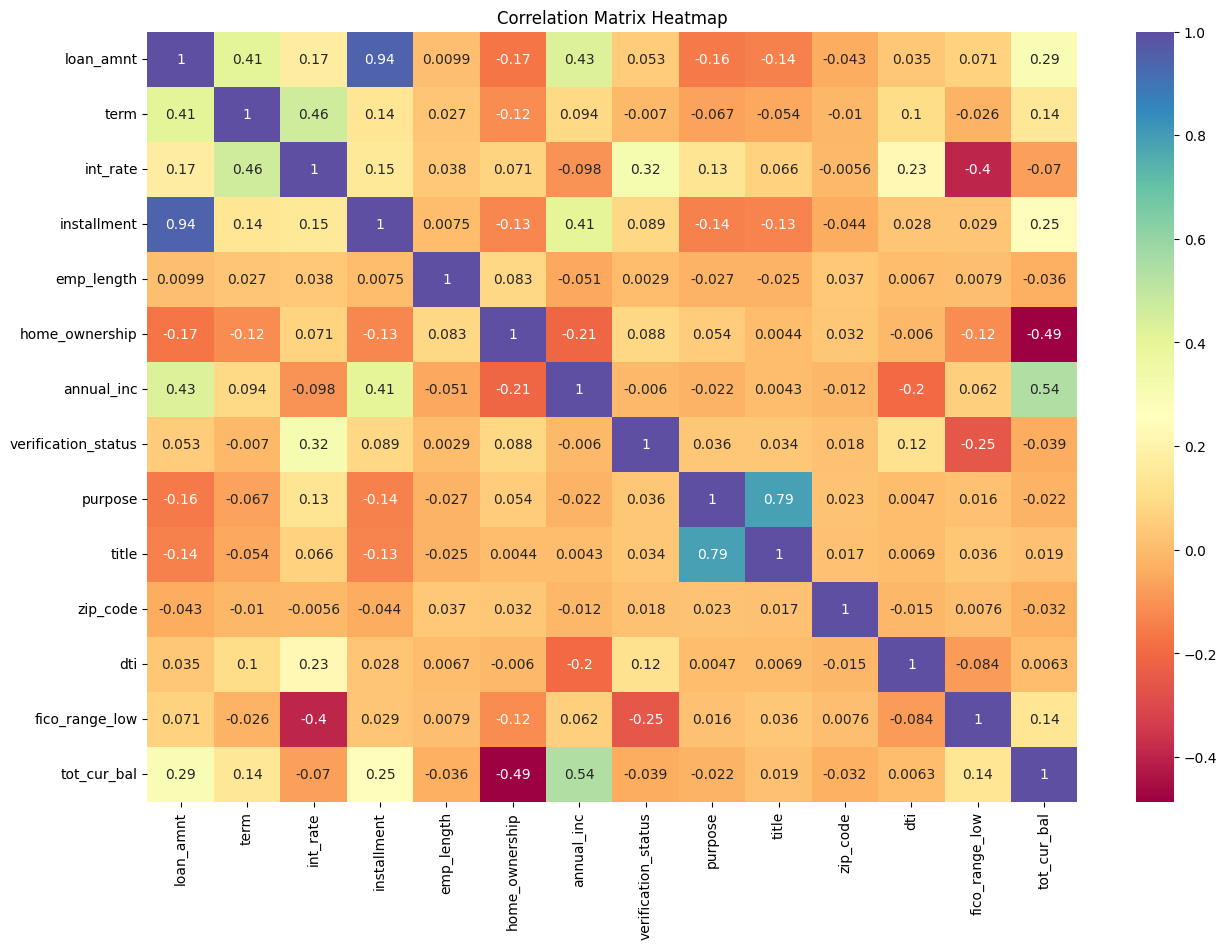

In [23]:
#Correlation Check
corr_matrix = X.corr()
plt.figure(figsize=(15, 10))  #figure size
sns.heatmap(corr_matrix, annot=True, cmap='Spectral')  #choose any cmap ['coolwarm', 'RdBu', 'seismic', 'bwr', 'PiYG', 'PRGn', 'RdYlBu', 'Spectral']

plt.title('Correlation Matrix Heatmap')
plt.show()

##Model  training and comparison

for Multi class

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


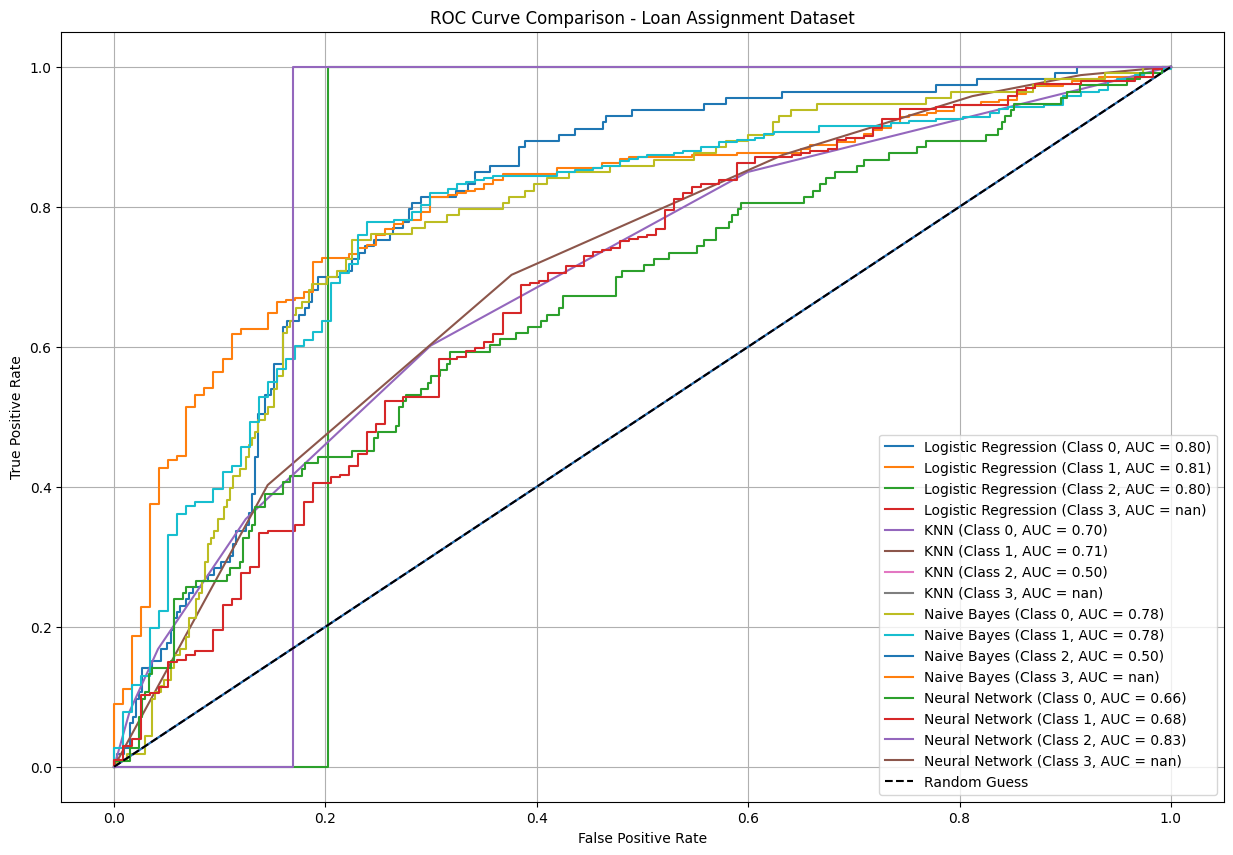

In [24]:
models = {
    "Logistic Regression": LogisticRegression(), # Set multi_class parameter
    "KNN": KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=5000, random_state=42)
}
plt.figure(figsize=(15, 10))

for name, model in models.items():
    # Fit
    model.fit(X_train_scaled, y_train)

    # Predict probabilities for all classes
    y_probs = model.predict_proba(X_test_scaled)

    # ROC and AUC for each class
    n_classes = y_test.nunique()  # Number of unique classes in y_test
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test, y_probs[:, i], pos_label=i)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (Class {i}, AUC = {roc_auc:.2f})")

# Plot random line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Final plot setup
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - Loan Assignment Dataset")
plt.legend(loc="lower right")
plt.grid()
plt.show()

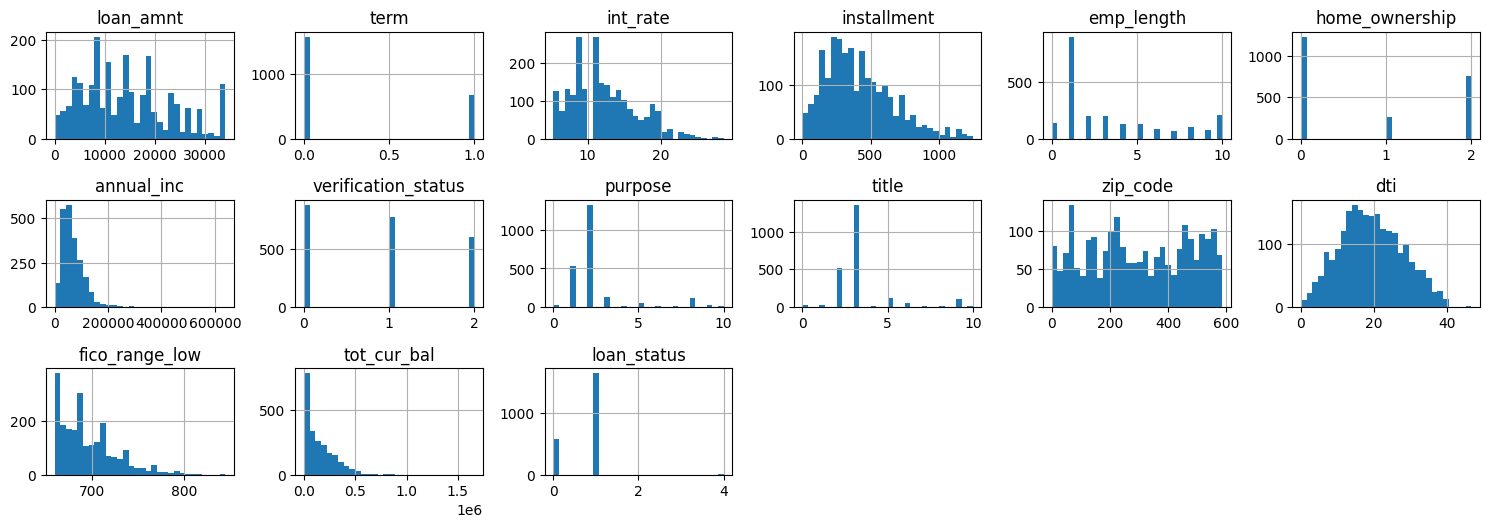

In [25]:
dataset.hist(bins=30, figsize=(15, 10), layout=(6, 6))
plt.tight_layout()
plt.show()

##R² Score

In [26]:
regr = LinearRegression()
regr.fit(X_train, y_train)
regr.score(X_test, y_test)
print("The Training accuracy of the model is {:.2f}".format(regr.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(regr.score(X_test, y_test)))

The Training accuracy of the model is 0.16
The Testing accuracy of the model is 0.13


In [27]:
predictions = regr.predict(X_test)
print(predictions)

[0.91517048 0.52797794 0.45026324 0.48565609 0.85529819 0.84114253
 0.91371336 0.93842151 0.91298449 0.79749395 0.65820607 0.55587195
 0.84098227 0.45996747 0.95570735 0.84597633 0.90494334 0.85846466
 0.77573021 0.82528539 0.94894649 0.83195168 0.563829   0.91564734
 0.93026835 0.82102877 0.80114714 0.42323735 0.82706896 0.53153498
 0.47686673 0.82197861 0.44825211 0.44624468 0.57786035 0.81953736
 0.79571313 0.40278995 0.78221722 0.90783054 0.85465985 0.896079
 0.89099731 0.44181893 0.84526483 0.88429462 0.59548554 0.48853338
 0.83519502 0.87623349 0.4545577  0.73519623 0.60444014 0.93953213
 0.53804245 0.90862508 0.97536563 0.82078293 0.8126062  0.94399972
 0.95178359 0.3987788  0.75487604 1.05188918 0.44127291 0.87736101
 0.90232206 0.37830885 0.45451779 0.74968573 0.5647538  0.92903449
 0.37955163 0.88841801 0.32955785 0.91370732 0.85260076 0.92665621
 0.45024154 1.04058555 0.91120335 0.81058862 0.49399666 0.97925134
 0.99283645 0.4121238  0.82373909 0.84813744 0.5010846  0.835792

In [28]:
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R² Score: 0.1276
Mean Squared Error: 0.2277


In [29]:
#Train
# Logistic Regression
log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

#Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

#Neural Networdk
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=5000, random_state=42)
nn_model.fit(X_train_scaled, y_train)
y_pred_nn = nn_model.predict(X_test_scaled)

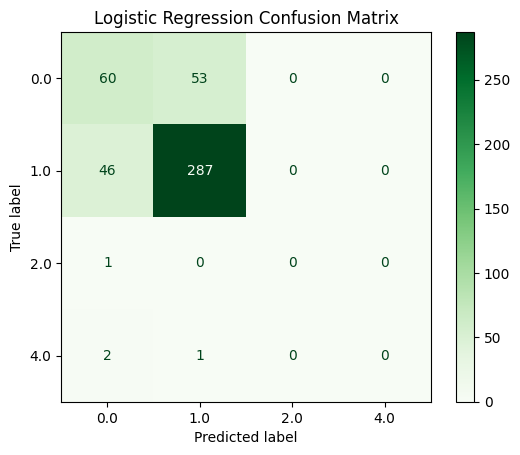

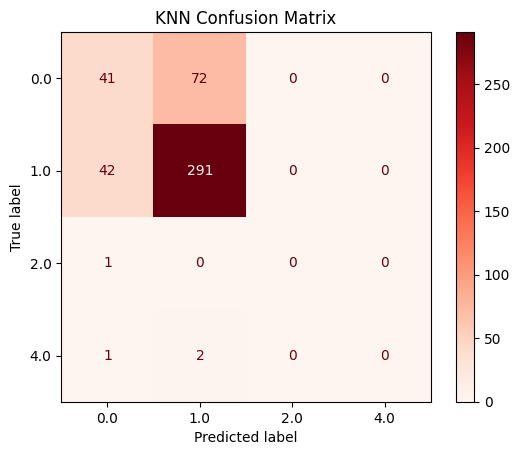

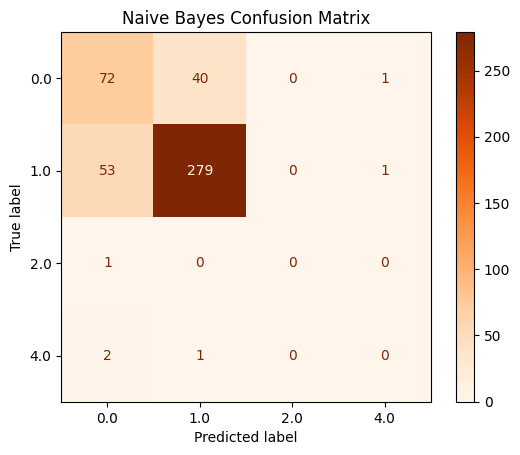

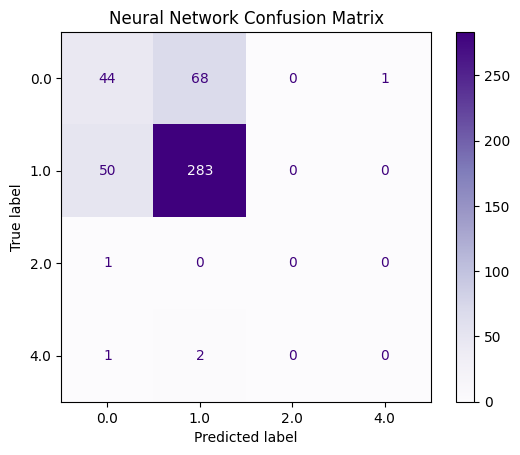

In [30]:
#Confusion Matrix
labels = sorted(set(y_test) | set(y_pred_log))

# Logistic Reg
cm_log = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm_log, display_labels=labels).plot(cmap="Greens")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


# KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm_knn, display_labels=labels).plot(cmap="Reds")
plt.title("KNN Confusion Matrix")
plt.show()

#Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(cm_nb, display_labels=labels).plot(cmap="Oranges")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

#Neural Network
cm_nn = confusion_matrix(y_test, y_pred_nn)
ConfusionMatrixDisplay(cm_nn, display_labels=labels).plot(cmap="Purples")
plt.title("Neural Network Confusion Matrix")
plt.show()


##Comparison

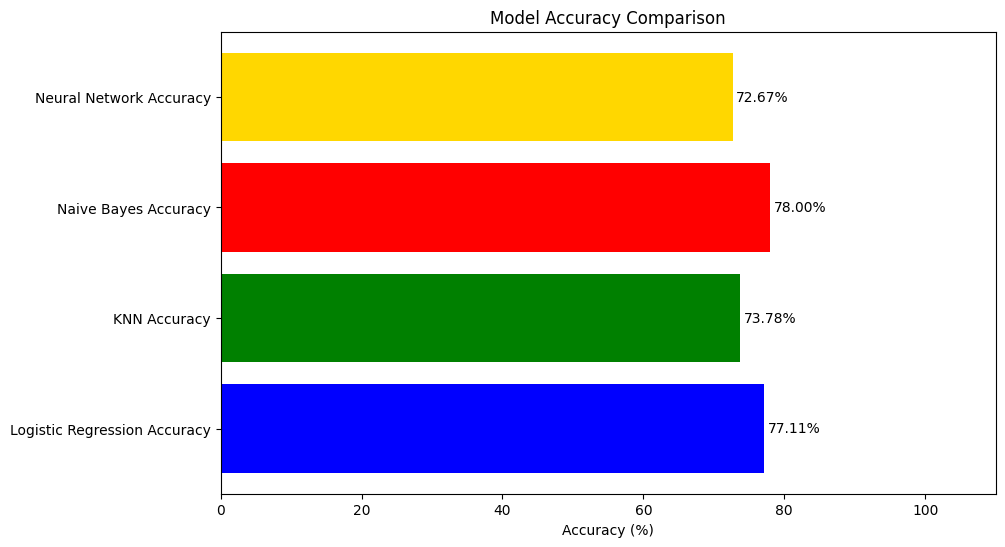

In [31]:
accuracy_percentages = {

    'Logistic Regression Accuracy':  accuracy_score(y_test, y_pred_log) * 100,
    "KNN Accuracy" :accuracy_score(y_test, y_pred_knn)*100,
    'Naive Bayes Accuracy':  accuracy_score(y_test, y_pred_nb) * 100,
    'Neural Network Accuracy':  accuracy_score(y_test, y_pred_nn) * 100
    }


models = list(accuracy_percentages.keys())
accuracy = list(accuracy_percentages.values())

colors = ["blue", "green", "red", "gold", "yellow"]

plt.figure(figsize=(10, 6))
plt.barh(models, accuracy, color=colors)
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 110)

for index, value in enumerate(accuracy):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

plt.show()